### Keras 딥러닝 모델 만들기
* tensorflow : google 내부에서 썼으나 최근 일반 공개
* pytorch : 네이버
* keras : 일반인도 사용할 수 있도록 프랑스 한 프로그래머가 만든 프로그램

* 데이터 셋 준비
* 모델 구성
* 오차 함수, 최적화 알고리즘
* 모델 학습
* 모델 평가

In [39]:
import tensorflow as tf 
import keras
import sys

In [40]:
print(tf.__version__)
print(keras.__version__)

2.3.1
2.4.3


### 사용할 패키지 불러오기
* MNIST 이미지 : 7만장

In [41]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense 
from keras.utils import np_utils

In [42]:
(X_train, y_train),(X_test, y_test)=mnist.load_data()

In [43]:
X_train_n=X_train.copy()
y_train_n=y_train.copy()
X_test_n=X_test.copy()
y_test_n=y_test.copy()

In [44]:
import matplotlib.pyplot as plt 

label=[5 0 4 1 9 2 1 3 1 4]


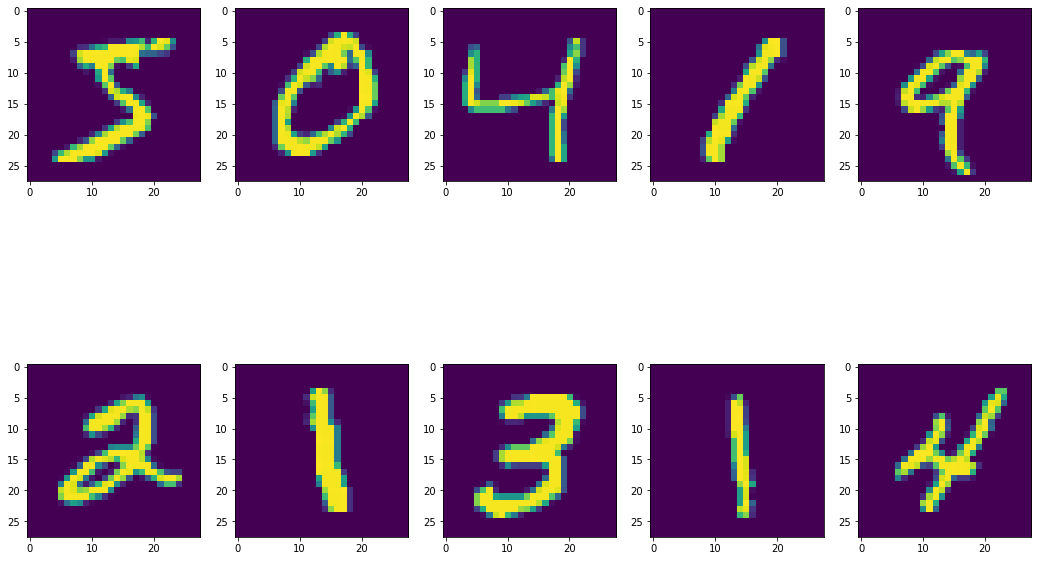

In [45]:
figure,axes = plt.subplots(nrows=2, ncols=5)  # 3행 5열의 구조 
figure.set_size_inches(18,12)  # 전체 크기

print("label={}".format(y_train[0:10]))   # y 레이블 데이터 0~10개 확인

col = 0
for row in range(0,2):
    col = row * 5
    axes[row][0].imshow(X_train[col])  # 0,5,10의 값을 갖는 위치 값 이미지 표시
    axes[row][1].imshow(X_train[col+1])# 1,6,11의 값을 갖는 위치 값 이미지 표시
    axes[row][2].imshow(X_train[col+2])# 2,7,12의 값을 갖는 위치 값 이미지 표시
    axes[row][3].imshow(X_train[col+3])# 3,8,13의 값을 갖는 위치 값 이미지 표시
    axes[row][4].imshow(X_train[col+4])# 4,9,114의 값을 갖는 위치 값 이미지 표시

### 입력-은닉-출력
* 입력층에 맞춰주기 위해 형태 변경

In [46]:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)

In [47]:
### 레이블의 데이터를 1D -> 2D 출력층에 맞춰줌
### One-Hot-Encoding 방법 이용
print(y_train.shape, y_test.shape)
print(y_train[0:5])

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(y_train[0:5])

(60000,) (10000,)
[5 0 4 1 9]
(60000, 10) (10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [48]:
print(X_train[0][:20])

X_train=X_train.astype('float32') /255.0
X_test=X_test.astype('float32')/255

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
